In [109]:
import torch

In [132]:
class BernoulliVariationalAutoencoder(torch.nn.Module):
    def __init__(self, in_features=167, hidden_features=32, latent_features=2):
        super(BernoulliVariationalAutoencoder, self).__init__()
        self._f_xz_mu = torch.nn.Sequential(
            torch.nn.Linear(in_features, hidden_features),
            torch.nn.ELU(),
            torch.nn.Linear(hidden_features, latent_features,)
        )
        
        self._f_xz_log_sigma = torch.nn.Sequential(
            torch.nn.Linear(in_features, hidden_features),
            torch.nn.ELU(),
            torch.nn.Linear(hidden_features, latent_features,)
        )
        
        self._f_zx = torch.nn.Sequential(
            torch.nn.Linear(latent_features, hidden_features),
            torch.nn.ELU(),
            torch.nn.Linear(hidden_features, in_features),
        )
        
    def f_xz(self, x):
        z_mu, z_log_sigma = self._f_xz_mu(x), self._f_xz_log_sigma(x)
        return torch.distributions.normal.Normal(
            z_mu,
            z_log_sigma.exp()
        )
        
    
    def f_zx(self, z):
        return self._f_zx(z)
        
    def get_loss(self, x):
        z_distribution = self.f_xz(x)
        z = z_distribution.rsample()
        x_new = self.f_zx(z)
        
        latent_distribution = torch.distributions.normal.Normal(
            torch.zeros_like(z),
            torch.ones_like(z),
        )
        target_distribution = torch.distributions.bernoulli.Bernoulli(
            probs=x,
        )
        
        return z_distribution.log_prob(z).sum() -latent_distribution.log_prob(z).sum() - target_distribution.log_prob(x_new).sum()

In [133]:
vae = BernoulliVariationalAutoencoder()

In [134]:
import pandas as pd
df = pd.read_csv("/Users/wangy1/Documents/GitHub/pinot/pinot/data/moonshot_with_date.csv")
moonshot_smiles = df["SMILES"]
df_series = pd.read_csv("activity_data.csv")
df = df.merge(df_series, how="left")
from rdkit import Chem
mols = [Chem.MolFromSmiles(smiles) for smiles in moonshot_smiles]
from rdkit.Chem import MACCSkeys
import numpy as np
fps = np.array([MACCSkeys.GenMACCSKeys(x) for x in mols])
x = torch.tensor(fps, dtype=torch.float32)

In [135]:
vae.get_loss(x)

tensor(552473.3125, grad_fn=<SubBackward0>)

In [136]:
optimizer = torch.optim.Adam(vae.parameters(), 1e-5)

for _ in range(10000):
    optimizer.zero_grad()
    loss = vae.get_loss(x)
    print(loss)
    loss.backward()
    optimizer.step()
    

tensor(546086., grad_fn=<SubBackward0>)
tensor(546806.4375, grad_fn=<SubBackward0>)
tensor(548031.6250, grad_fn=<SubBackward0>)
tensor(550053.6250, grad_fn=<SubBackward0>)
tensor(548761.7500, grad_fn=<SubBackward0>)
tensor(547128.3125, grad_fn=<SubBackward0>)
tensor(548341.2500, grad_fn=<SubBackward0>)
tensor(547201.8750, grad_fn=<SubBackward0>)
tensor(548873.5000, grad_fn=<SubBackward0>)
tensor(547808.8125, grad_fn=<SubBackward0>)
tensor(546454.1875, grad_fn=<SubBackward0>)
tensor(548568.1875, grad_fn=<SubBackward0>)
tensor(547648.9375, grad_fn=<SubBackward0>)
tensor(546010.0625, grad_fn=<SubBackward0>)
tensor(546588.1875, grad_fn=<SubBackward0>)
tensor(547196.7500, grad_fn=<SubBackward0>)
tensor(547130.7500, grad_fn=<SubBackward0>)
tensor(545674.6875, grad_fn=<SubBackward0>)
tensor(545295.3125, grad_fn=<SubBackward0>)
tensor(545143.1875, grad_fn=<SubBackward0>)
tensor(545943.9375, grad_fn=<SubBackward0>)
tensor(545120.8750, grad_fn=<SubBackward0>)
tensor(546954.6250, grad_fn=<SubBack

tensor(508863.0625, grad_fn=<SubBackward0>)
tensor(508501.2500, grad_fn=<SubBackward0>)
tensor(509040.7812, grad_fn=<SubBackward0>)
tensor(509594.5625, grad_fn=<SubBackward0>)
tensor(505816.6250, grad_fn=<SubBackward0>)
tensor(510587.1250, grad_fn=<SubBackward0>)
tensor(509235.0625, grad_fn=<SubBackward0>)
tensor(507061.4375, grad_fn=<SubBackward0>)
tensor(504082.4062, grad_fn=<SubBackward0>)
tensor(510224.8750, grad_fn=<SubBackward0>)
tensor(508321.3438, grad_fn=<SubBackward0>)
tensor(509062.0312, grad_fn=<SubBackward0>)
tensor(506692.4062, grad_fn=<SubBackward0>)
tensor(507095.2500, grad_fn=<SubBackward0>)
tensor(503091.0938, grad_fn=<SubBackward0>)
tensor(509666.8125, grad_fn=<SubBackward0>)
tensor(505970.4688, grad_fn=<SubBackward0>)
tensor(504826.7500, grad_fn=<SubBackward0>)
tensor(507603.9688, grad_fn=<SubBackward0>)
tensor(507113.4375, grad_fn=<SubBackward0>)
tensor(505727.0938, grad_fn=<SubBackward0>)
tensor(502870.0625, grad_fn=<SubBackward0>)
tensor(505180.7812, grad_fn=<Sub

tensor(447396.0625, grad_fn=<SubBackward0>)
tensor(447096.0312, grad_fn=<SubBackward0>)
tensor(445464.7500, grad_fn=<SubBackward0>)
tensor(454783.5312, grad_fn=<SubBackward0>)
tensor(449290.5312, grad_fn=<SubBackward0>)
tensor(449974.3125, grad_fn=<SubBackward0>)
tensor(447273.9688, grad_fn=<SubBackward0>)
tensor(451187.6250, grad_fn=<SubBackward0>)
tensor(445667.8438, grad_fn=<SubBackward0>)
tensor(445524.9688, grad_fn=<SubBackward0>)
tensor(448485.6875, grad_fn=<SubBackward0>)
tensor(442487., grad_fn=<SubBackward0>)
tensor(450194.7188, grad_fn=<SubBackward0>)
tensor(446189.5938, grad_fn=<SubBackward0>)
tensor(441133.6250, grad_fn=<SubBackward0>)
tensor(449690.8438, grad_fn=<SubBackward0>)
tensor(436019.8438, grad_fn=<SubBackward0>)
tensor(447680.6875, grad_fn=<SubBackward0>)
tensor(438567.1875, grad_fn=<SubBackward0>)
tensor(436076.7500, grad_fn=<SubBackward0>)
tensor(443300.0312, grad_fn=<SubBackward0>)
tensor(446134.1562, grad_fn=<SubBackward0>)
tensor(447401.7812, grad_fn=<SubBack

tensor(313003.1250, grad_fn=<SubBackward0>)
tensor(300831.9375, grad_fn=<SubBackward0>)
tensor(298110.6562, grad_fn=<SubBackward0>)
tensor(277090.8125, grad_fn=<SubBackward0>)
tensor(313607.7188, grad_fn=<SubBackward0>)
tensor(321837.6250, grad_fn=<SubBackward0>)
tensor(293721.7500, grad_fn=<SubBackward0>)
tensor(297062.5000, grad_fn=<SubBackward0>)
tensor(318226.1875, grad_fn=<SubBackward0>)
tensor(295258.5312, grad_fn=<SubBackward0>)
tensor(273201.7812, grad_fn=<SubBackward0>)
tensor(277250.7500, grad_fn=<SubBackward0>)
tensor(309581.0625, grad_fn=<SubBackward0>)
tensor(303633.6250, grad_fn=<SubBackward0>)
tensor(292477.3438, grad_fn=<SubBackward0>)
tensor(272694.5938, grad_fn=<SubBackward0>)
tensor(295013.9375, grad_fn=<SubBackward0>)
tensor(323955.7500, grad_fn=<SubBackward0>)
tensor(292955.9062, grad_fn=<SubBackward0>)
tensor(298331.5625, grad_fn=<SubBackward0>)
tensor(269564.3438, grad_fn=<SubBackward0>)
tensor(283269.4062, grad_fn=<SubBackward0>)
tensor(289864.7188, grad_fn=<Sub

tensor(-50149.8164, grad_fn=<SubBackward0>)
tensor(-62065.3516, grad_fn=<SubBackward0>)
tensor(-82669.2812, grad_fn=<SubBackward0>)
tensor(-64397.1250, grad_fn=<SubBackward0>)
tensor(-87731.0938, grad_fn=<SubBackward0>)
tensor(-155092.0625, grad_fn=<SubBackward0>)
tensor(-101750.2109, grad_fn=<SubBackward0>)
tensor(-113738.5859, grad_fn=<SubBackward0>)
tensor(-148255.7500, grad_fn=<SubBackward0>)
tensor(-133730.8594, grad_fn=<SubBackward0>)
tensor(-120092.1797, grad_fn=<SubBackward0>)
tensor(-142454.4375, grad_fn=<SubBackward0>)
tensor(-146015.3750, grad_fn=<SubBackward0>)
tensor(-123661.8203, grad_fn=<SubBackward0>)
tensor(-96860.8906, grad_fn=<SubBackward0>)
tensor(-223409.0938, grad_fn=<SubBackward0>)
tensor(-200060.7188, grad_fn=<SubBackward0>)
tensor(-143273.9062, grad_fn=<SubBackward0>)
tensor(-189767.6875, grad_fn=<SubBackward0>)
tensor(-157512.3125, grad_fn=<SubBackward0>)
tensor(-160542.7812, grad_fn=<SubBackward0>)
tensor(-141874.3594, grad_fn=<SubBackward0>)
tensor(-205646.7

tensor(-1820027.2500, grad_fn=<SubBackward0>)
tensor(-1675966.7500, grad_fn=<SubBackward0>)
tensor(-1878730.5000, grad_fn=<SubBackward0>)
tensor(-1709556.7500, grad_fn=<SubBackward0>)
tensor(-1891627.3750, grad_fn=<SubBackward0>)
tensor(-1734043.5000, grad_fn=<SubBackward0>)
tensor(-1904602.8750, grad_fn=<SubBackward0>)
tensor(-1553315.6250, grad_fn=<SubBackward0>)
tensor(-1776570.8750, grad_fn=<SubBackward0>)
tensor(-1758548.5000, grad_fn=<SubBackward0>)
tensor(-1913361.2500, grad_fn=<SubBackward0>)
tensor(-1900043.5000, grad_fn=<SubBackward0>)
tensor(-1768738.5000, grad_fn=<SubBackward0>)
tensor(-2068992.8750, grad_fn=<SubBackward0>)
tensor(-1740205.1250, grad_fn=<SubBackward0>)
tensor(-1868658.2500, grad_fn=<SubBackward0>)
tensor(-1768487.6250, grad_fn=<SubBackward0>)
tensor(-1786228.5000, grad_fn=<SubBackward0>)
tensor(-1953224., grad_fn=<SubBackward0>)
tensor(-2104698.2500, grad_fn=<SubBackward0>)
tensor(-2048884.5000, grad_fn=<SubBackward0>)
tensor(-2085787.8750, grad_fn=<SubBack

tensor(-4322448., grad_fn=<SubBackward0>)
tensor(-4269008.5000, grad_fn=<SubBackward0>)
tensor(-4212223., grad_fn=<SubBackward0>)
tensor(-4081982.7500, grad_fn=<SubBackward0>)
tensor(-4617716., grad_fn=<SubBackward0>)
tensor(-4498989.5000, grad_fn=<SubBackward0>)
tensor(-4057309., grad_fn=<SubBackward0>)
tensor(-3820023.7500, grad_fn=<SubBackward0>)
tensor(-4151426.7500, grad_fn=<SubBackward0>)
tensor(-3625806., grad_fn=<SubBackward0>)
tensor(-4645060., grad_fn=<SubBackward0>)
tensor(-4529799.5000, grad_fn=<SubBackward0>)
tensor(-4592390.5000, grad_fn=<SubBackward0>)
tensor(-4373044.5000, grad_fn=<SubBackward0>)
tensor(-4740266., grad_fn=<SubBackward0>)
tensor(-4392372., grad_fn=<SubBackward0>)
tensor(-4304864., grad_fn=<SubBackward0>)
tensor(-4901436., grad_fn=<SubBackward0>)
tensor(-4879865., grad_fn=<SubBackward0>)
tensor(-4581385.5000, grad_fn=<SubBackward0>)
tensor(-4014326.7500, grad_fn=<SubBackward0>)
tensor(-4604612.5000, grad_fn=<SubBackward0>)
tensor(-4521724., grad_fn=<SubBa

tensor(-7928623.5000, grad_fn=<SubBackward0>)
tensor(-7845695.5000, grad_fn=<SubBackward0>)
tensor(-8234950.5000, grad_fn=<SubBackward0>)
tensor(-6722990.5000, grad_fn=<SubBackward0>)
tensor(-7152642., grad_fn=<SubBackward0>)
tensor(-7169302.5000, grad_fn=<SubBackward0>)
tensor(-7781165., grad_fn=<SubBackward0>)
tensor(-7357630.5000, grad_fn=<SubBackward0>)
tensor(-7946485.5000, grad_fn=<SubBackward0>)
tensor(-7328972., grad_fn=<SubBackward0>)
tensor(-7969121.5000, grad_fn=<SubBackward0>)
tensor(-7543967.5000, grad_fn=<SubBackward0>)
tensor(-7594600.5000, grad_fn=<SubBackward0>)
tensor(-7240603.5000, grad_fn=<SubBackward0>)
tensor(-7983812.5000, grad_fn=<SubBackward0>)
tensor(-8205971., grad_fn=<SubBackward0>)
tensor(-7643407.5000, grad_fn=<SubBackward0>)
tensor(-7481398.5000, grad_fn=<SubBackward0>)
tensor(-6466125., grad_fn=<SubBackward0>)
tensor(-7993029., grad_fn=<SubBackward0>)
tensor(-6228305., grad_fn=<SubBackward0>)
tensor(-7920194.5000, grad_fn=<SubBackward0>)
tensor(-7984334.

tensor(-10885477., grad_fn=<SubBackward0>)
tensor(-10361963., grad_fn=<SubBackward0>)
tensor(-10166513., grad_fn=<SubBackward0>)
tensor(-8997621., grad_fn=<SubBackward0>)
tensor(-10442159., grad_fn=<SubBackward0>)
tensor(-10649290., grad_fn=<SubBackward0>)
tensor(-9497203., grad_fn=<SubBackward0>)
tensor(-10172375., grad_fn=<SubBackward0>)
tensor(-11094264., grad_fn=<SubBackward0>)
tensor(-11718626., grad_fn=<SubBackward0>)
tensor(-11436017., grad_fn=<SubBackward0>)
tensor(-10314645., grad_fn=<SubBackward0>)
tensor(-10847888., grad_fn=<SubBackward0>)
tensor(-9498897., grad_fn=<SubBackward0>)
tensor(-10555547., grad_fn=<SubBackward0>)
tensor(-11123258., grad_fn=<SubBackward0>)
tensor(-11063011., grad_fn=<SubBackward0>)
tensor(-11440235., grad_fn=<SubBackward0>)
tensor(-11823307., grad_fn=<SubBackward0>)
tensor(-12433213., grad_fn=<SubBackward0>)
tensor(-10413147., grad_fn=<SubBackward0>)
tensor(-9515137., grad_fn=<SubBackward0>)
tensor(-11087042., grad_fn=<SubBackward0>)
tensor(-1134164

tensor(-14527381., grad_fn=<SubBackward0>)
tensor(-14414460., grad_fn=<SubBackward0>)
tensor(-14836904., grad_fn=<SubBackward0>)
tensor(-15268970., grad_fn=<SubBackward0>)
tensor(-13232542., grad_fn=<SubBackward0>)
tensor(-15443188., grad_fn=<SubBackward0>)
tensor(-13929462., grad_fn=<SubBackward0>)
tensor(-15415202., grad_fn=<SubBackward0>)
tensor(-14437718., grad_fn=<SubBackward0>)
tensor(-14248829., grad_fn=<SubBackward0>)
tensor(-14609031., grad_fn=<SubBackward0>)
tensor(-14557704., grad_fn=<SubBackward0>)
tensor(-14270327., grad_fn=<SubBackward0>)
tensor(-15737182., grad_fn=<SubBackward0>)
tensor(-16330671., grad_fn=<SubBackward0>)
tensor(-16642489., grad_fn=<SubBackward0>)
tensor(-14274483., grad_fn=<SubBackward0>)
tensor(-13898689., grad_fn=<SubBackward0>)
tensor(-14714904., grad_fn=<SubBackward0>)
tensor(-16180972., grad_fn=<SubBackward0>)
tensor(-15154117., grad_fn=<SubBackward0>)
tensor(-14709228., grad_fn=<SubBackward0>)
tensor(-13951037., grad_fn=<SubBackward0>)
tensor(-157

tensor(-20897148., grad_fn=<SubBackward0>)
tensor(-15794686., grad_fn=<SubBackward0>)
tensor(-18186320., grad_fn=<SubBackward0>)
tensor(-19396482., grad_fn=<SubBackward0>)
tensor(-20892008., grad_fn=<SubBackward0>)
tensor(-19916226., grad_fn=<SubBackward0>)
tensor(-19310410., grad_fn=<SubBackward0>)
tensor(-18114724., grad_fn=<SubBackward0>)
tensor(-19667744., grad_fn=<SubBackward0>)
tensor(-17173888., grad_fn=<SubBackward0>)
tensor(-13045960., grad_fn=<SubBackward0>)
tensor(-19555286., grad_fn=<SubBackward0>)
tensor(-20431632., grad_fn=<SubBackward0>)
tensor(-18176218., grad_fn=<SubBackward0>)
tensor(-16713866., grad_fn=<SubBackward0>)
tensor(-20164488., grad_fn=<SubBackward0>)
tensor(-18015510., grad_fn=<SubBackward0>)
tensor(-18513888., grad_fn=<SubBackward0>)
tensor(-19585020., grad_fn=<SubBackward0>)
tensor(-19517156., grad_fn=<SubBackward0>)
tensor(-19127698., grad_fn=<SubBackward0>)
tensor(-18510822., grad_fn=<SubBackward0>)
tensor(-17992316., grad_fn=<SubBackward0>)
tensor(-194

tensor(-22166366., grad_fn=<SubBackward0>)
tensor(-26468992., grad_fn=<SubBackward0>)
tensor(-21780540., grad_fn=<SubBackward0>)
tensor(-24321466., grad_fn=<SubBackward0>)
tensor(-24933224., grad_fn=<SubBackward0>)
tensor(-24518048., grad_fn=<SubBackward0>)
tensor(-21533128., grad_fn=<SubBackward0>)
tensor(-22230774., grad_fn=<SubBackward0>)
tensor(-25912970., grad_fn=<SubBackward0>)
tensor(-21868860., grad_fn=<SubBackward0>)
tensor(-24697974., grad_fn=<SubBackward0>)
tensor(-23411206., grad_fn=<SubBackward0>)
tensor(-25340886., grad_fn=<SubBackward0>)
tensor(-23993838., grad_fn=<SubBackward0>)
tensor(-23142810., grad_fn=<SubBackward0>)
tensor(-25308338., grad_fn=<SubBackward0>)
tensor(-22368144., grad_fn=<SubBackward0>)
tensor(-23778054., grad_fn=<SubBackward0>)
tensor(-26648800., grad_fn=<SubBackward0>)
tensor(-27862628., grad_fn=<SubBackward0>)
tensor(-24907224., grad_fn=<SubBackward0>)
tensor(-25015018., grad_fn=<SubBackward0>)
tensor(-23947100., grad_fn=<SubBackward0>)
tensor(-230

tensor(-26250948., grad_fn=<SubBackward0>)
tensor(-30673202., grad_fn=<SubBackward0>)
tensor(-27665102., grad_fn=<SubBackward0>)
tensor(-31615540., grad_fn=<SubBackward0>)
tensor(-31624136., grad_fn=<SubBackward0>)
tensor(-30398850., grad_fn=<SubBackward0>)
tensor(-31363016., grad_fn=<SubBackward0>)
tensor(-30737598., grad_fn=<SubBackward0>)
tensor(-30942544., grad_fn=<SubBackward0>)
tensor(-31351782., grad_fn=<SubBackward0>)
tensor(-29302824., grad_fn=<SubBackward0>)
tensor(-29245988., grad_fn=<SubBackward0>)
tensor(-30496030., grad_fn=<SubBackward0>)
tensor(-30309878., grad_fn=<SubBackward0>)
tensor(-27248290., grad_fn=<SubBackward0>)
tensor(-30929044., grad_fn=<SubBackward0>)
tensor(-29390542., grad_fn=<SubBackward0>)
tensor(-30095410., grad_fn=<SubBackward0>)
tensor(-30862740., grad_fn=<SubBackward0>)
tensor(-27928438., grad_fn=<SubBackward0>)
tensor(-29994026., grad_fn=<SubBackward0>)
tensor(-31110630., grad_fn=<SubBackward0>)
tensor(-28994484., grad_fn=<SubBackward0>)
tensor(-338

tensor(-34280948., grad_fn=<SubBackward0>)
tensor(-34254928., grad_fn=<SubBackward0>)
tensor(-38313912., grad_fn=<SubBackward0>)
tensor(-40878652., grad_fn=<SubBackward0>)
tensor(-37991716., grad_fn=<SubBackward0>)
tensor(-40860696., grad_fn=<SubBackward0>)
tensor(-37978776., grad_fn=<SubBackward0>)
tensor(-35135224., grad_fn=<SubBackward0>)
tensor(-37512080., grad_fn=<SubBackward0>)
tensor(-34629300., grad_fn=<SubBackward0>)
tensor(-38909252., grad_fn=<SubBackward0>)
tensor(-39015072., grad_fn=<SubBackward0>)
tensor(-40625040., grad_fn=<SubBackward0>)
tensor(-38237872., grad_fn=<SubBackward0>)
tensor(-34104640., grad_fn=<SubBackward0>)
tensor(-39777588., grad_fn=<SubBackward0>)
tensor(-35889876., grad_fn=<SubBackward0>)
tensor(-39853572., grad_fn=<SubBackward0>)
tensor(-37087728., grad_fn=<SubBackward0>)
tensor(-41276248., grad_fn=<SubBackward0>)
tensor(-38821128., grad_fn=<SubBackward0>)
tensor(-36888008., grad_fn=<SubBackward0>)
tensor(-38813640., grad_fn=<SubBackward0>)
tensor(-394

tensor(-42796588., grad_fn=<SubBackward0>)
tensor(-46524356., grad_fn=<SubBackward0>)
tensor(-45227592., grad_fn=<SubBackward0>)
tensor(-46422084., grad_fn=<SubBackward0>)
tensor(-44020824., grad_fn=<SubBackward0>)
tensor(-45434264., grad_fn=<SubBackward0>)
tensor(-47796104., grad_fn=<SubBackward0>)
tensor(-47082304., grad_fn=<SubBackward0>)
tensor(-46196360., grad_fn=<SubBackward0>)
tensor(-47792724., grad_fn=<SubBackward0>)
tensor(-49474216., grad_fn=<SubBackward0>)
tensor(-46844276., grad_fn=<SubBackward0>)
tensor(-46687456., grad_fn=<SubBackward0>)
tensor(-41395628., grad_fn=<SubBackward0>)
tensor(-45659884., grad_fn=<SubBackward0>)
tensor(-47491080., grad_fn=<SubBackward0>)
tensor(-44408216., grad_fn=<SubBackward0>)
tensor(-45173860., grad_fn=<SubBackward0>)
tensor(-42354764., grad_fn=<SubBackward0>)
tensor(-47890324., grad_fn=<SubBackward0>)
tensor(-47309664., grad_fn=<SubBackward0>)
tensor(-46875496., grad_fn=<SubBackward0>)
tensor(-46762000., grad_fn=<SubBackward0>)
tensor(-496

tensor(-55155276., grad_fn=<SubBackward0>)
tensor(-56228244., grad_fn=<SubBackward0>)
tensor(-53274352., grad_fn=<SubBackward0>)
tensor(-53553428., grad_fn=<SubBackward0>)
tensor(-55875860., grad_fn=<SubBackward0>)
tensor(-51444900., grad_fn=<SubBackward0>)
tensor(-54250248., grad_fn=<SubBackward0>)
tensor(-52580984., grad_fn=<SubBackward0>)
tensor(-54063236., grad_fn=<SubBackward0>)
tensor(-53489116., grad_fn=<SubBackward0>)
tensor(-58254804., grad_fn=<SubBackward0>)
tensor(-52075148., grad_fn=<SubBackward0>)
tensor(-53939860., grad_fn=<SubBackward0>)
tensor(-58656484., grad_fn=<SubBackward0>)
tensor(-46720772., grad_fn=<SubBackward0>)
tensor(-55519356., grad_fn=<SubBackward0>)
tensor(-55608916., grad_fn=<SubBackward0>)
tensor(-51996616., grad_fn=<SubBackward0>)
tensor(-54367420., grad_fn=<SubBackward0>)
tensor(-55947312., grad_fn=<SubBackward0>)
tensor(-55644052., grad_fn=<SubBackward0>)
tensor(-58994824., grad_fn=<SubBackward0>)
tensor(-58354608., grad_fn=<SubBackward0>)
tensor(-555

tensor(-59493980., grad_fn=<SubBackward0>)
tensor(-64628704., grad_fn=<SubBackward0>)
tensor(-64894592., grad_fn=<SubBackward0>)
tensor(-63830936., grad_fn=<SubBackward0>)
tensor(-66524836., grad_fn=<SubBackward0>)
tensor(-58379800., grad_fn=<SubBackward0>)
tensor(-59421688., grad_fn=<SubBackward0>)
tensor(-63347008., grad_fn=<SubBackward0>)
tensor(-66441116., grad_fn=<SubBackward0>)
tensor(-65027192., grad_fn=<SubBackward0>)
tensor(-60713276., grad_fn=<SubBackward0>)
tensor(-66128096., grad_fn=<SubBackward0>)
tensor(-66081388., grad_fn=<SubBackward0>)
tensor(-58863948., grad_fn=<SubBackward0>)
tensor(-66564652., grad_fn=<SubBackward0>)
tensor(-64682476., grad_fn=<SubBackward0>)
tensor(-66587132., grad_fn=<SubBackward0>)
tensor(-65141848., grad_fn=<SubBackward0>)
tensor(-64899092., grad_fn=<SubBackward0>)
tensor(-59707032., grad_fn=<SubBackward0>)
tensor(-58303820., grad_fn=<SubBackward0>)
tensor(-65984464., grad_fn=<SubBackward0>)
tensor(-67509472., grad_fn=<SubBackward0>)
tensor(-679

tensor(-72287328., grad_fn=<SubBackward0>)
tensor(-75172208., grad_fn=<SubBackward0>)
tensor(-76513032., grad_fn=<SubBackward0>)
tensor(-71123848., grad_fn=<SubBackward0>)
tensor(-75712960., grad_fn=<SubBackward0>)
tensor(-75156480., grad_fn=<SubBackward0>)
tensor(-75644928., grad_fn=<SubBackward0>)
tensor(-71767856., grad_fn=<SubBackward0>)
tensor(-65138240., grad_fn=<SubBackward0>)
tensor(-75224608., grad_fn=<SubBackward0>)
tensor(-74343664., grad_fn=<SubBackward0>)
tensor(-70830192., grad_fn=<SubBackward0>)
tensor(-78760400., grad_fn=<SubBackward0>)
tensor(-75399096., grad_fn=<SubBackward0>)
tensor(-74484368., grad_fn=<SubBackward0>)
tensor(-76176016., grad_fn=<SubBackward0>)
tensor(-77433864., grad_fn=<SubBackward0>)
tensor(-75402264., grad_fn=<SubBackward0>)
tensor(-72212752., grad_fn=<SubBackward0>)
tensor(-78276824., grad_fn=<SubBackward0>)
tensor(-76786960., grad_fn=<SubBackward0>)
tensor(-74405632., grad_fn=<SubBackward0>)
tensor(-74216456., grad_fn=<SubBackward0>)
tensor(-749

tensor(-83023832., grad_fn=<SubBackward0>)
tensor(-79319232., grad_fn=<SubBackward0>)
tensor(-89346088., grad_fn=<SubBackward0>)
tensor(-86790088., grad_fn=<SubBackward0>)
tensor(-89283024., grad_fn=<SubBackward0>)
tensor(-87887216., grad_fn=<SubBackward0>)
tensor(-84100264., grad_fn=<SubBackward0>)
tensor(-91062032., grad_fn=<SubBackward0>)
tensor(-82433080., grad_fn=<SubBackward0>)
tensor(-84479128., grad_fn=<SubBackward0>)
tensor(-83185208., grad_fn=<SubBackward0>)
tensor(-78961976., grad_fn=<SubBackward0>)
tensor(-90471656., grad_fn=<SubBackward0>)
tensor(-79948760., grad_fn=<SubBackward0>)
tensor(-88360664., grad_fn=<SubBackward0>)
tensor(-91542984., grad_fn=<SubBackward0>)
tensor(-91713824., grad_fn=<SubBackward0>)
tensor(-95029688., grad_fn=<SubBackward0>)
tensor(-88810080., grad_fn=<SubBackward0>)
tensor(-89671616., grad_fn=<SubBackward0>)
tensor(-90910664., grad_fn=<SubBackward0>)
tensor(-93417640., grad_fn=<SubBackward0>)
tensor(-89490040., grad_fn=<SubBackward0>)
tensor(-879

tensor(-97234512., grad_fn=<SubBackward0>)
tensor(-93998536., grad_fn=<SubBackward0>)
tensor(-1.0172e+08, grad_fn=<SubBackward0>)
tensor(-99382968., grad_fn=<SubBackward0>)
tensor(-92726464., grad_fn=<SubBackward0>)
tensor(-92992888., grad_fn=<SubBackward0>)
tensor(-95768944., grad_fn=<SubBackward0>)
tensor(-1.0221e+08, grad_fn=<SubBackward0>)
tensor(-99336136., grad_fn=<SubBackward0>)
tensor(-97263248., grad_fn=<SubBackward0>)
tensor(-96702168., grad_fn=<SubBackward0>)
tensor(-95795264., grad_fn=<SubBackward0>)
tensor(-92493992., grad_fn=<SubBackward0>)
tensor(-95650440., grad_fn=<SubBackward0>)
tensor(-99667008., grad_fn=<SubBackward0>)
tensor(-98011600., grad_fn=<SubBackward0>)
tensor(-99938208., grad_fn=<SubBackward0>)
tensor(-1.0296e+08, grad_fn=<SubBackward0>)
tensor(-98731952., grad_fn=<SubBackward0>)
tensor(-93183792., grad_fn=<SubBackward0>)
tensor(-93597536., grad_fn=<SubBackward0>)
tensor(-1.0233e+08, grad_fn=<SubBackward0>)
tensor(-1.0446e+08, grad_fn=<SubBackward0>)
tensor

tensor(-1.1525e+08, grad_fn=<SubBackward0>)
tensor(-1.1399e+08, grad_fn=<SubBackward0>)
tensor(-1.1419e+08, grad_fn=<SubBackward0>)
tensor(-1.1666e+08, grad_fn=<SubBackward0>)
tensor(-1.0626e+08, grad_fn=<SubBackward0>)
tensor(-1.1677e+08, grad_fn=<SubBackward0>)
tensor(-1.1145e+08, grad_fn=<SubBackward0>)
tensor(-1.0989e+08, grad_fn=<SubBackward0>)
tensor(-1.0891e+08, grad_fn=<SubBackward0>)
tensor(-1.1327e+08, grad_fn=<SubBackward0>)
tensor(-1.1198e+08, grad_fn=<SubBackward0>)
tensor(-1.1175e+08, grad_fn=<SubBackward0>)
tensor(-1.1907e+08, grad_fn=<SubBackward0>)
tensor(-1.1688e+08, grad_fn=<SubBackward0>)
tensor(-1.2045e+08, grad_fn=<SubBackward0>)
tensor(-1.1958e+08, grad_fn=<SubBackward0>)
tensor(-1.1688e+08, grad_fn=<SubBackward0>)
tensor(-1.1213e+08, grad_fn=<SubBackward0>)
tensor(-1.1132e+08, grad_fn=<SubBackward0>)
tensor(-1.0818e+08, grad_fn=<SubBackward0>)
tensor(-1.1396e+08, grad_fn=<SubBackward0>)
tensor(-1.0551e+08, grad_fn=<SubBackward0>)
tensor(-1.1882e+08, grad_fn=<Sub

tensor(-1.2502e+08, grad_fn=<SubBackward0>)
tensor(-1.2102e+08, grad_fn=<SubBackward0>)
tensor(-1.2079e+08, grad_fn=<SubBackward0>)
tensor(-1.2813e+08, grad_fn=<SubBackward0>)
tensor(-1.2249e+08, grad_fn=<SubBackward0>)
tensor(-1.2579e+08, grad_fn=<SubBackward0>)
tensor(-1.2759e+08, grad_fn=<SubBackward0>)
tensor(-1.2806e+08, grad_fn=<SubBackward0>)
tensor(-1.2036e+08, grad_fn=<SubBackward0>)
tensor(-1.2749e+08, grad_fn=<SubBackward0>)
tensor(-1.3345e+08, grad_fn=<SubBackward0>)
tensor(-1.1825e+08, grad_fn=<SubBackward0>)
tensor(-1.2854e+08, grad_fn=<SubBackward0>)
tensor(-1.3166e+08, grad_fn=<SubBackward0>)
tensor(-1.1914e+08, grad_fn=<SubBackward0>)
tensor(-1.2462e+08, grad_fn=<SubBackward0>)
tensor(-1.2680e+08, grad_fn=<SubBackward0>)
tensor(-1.2076e+08, grad_fn=<SubBackward0>)
tensor(-1.1671e+08, grad_fn=<SubBackward0>)
tensor(-1.2463e+08, grad_fn=<SubBackward0>)
tensor(-1.2529e+08, grad_fn=<SubBackward0>)
tensor(-1.3406e+08, grad_fn=<SubBackward0>)
tensor(-1.1537e+08, grad_fn=<Sub

tensor(-1.4373e+08, grad_fn=<SubBackward0>)
tensor(-1.5174e+08, grad_fn=<SubBackward0>)
tensor(-1.3825e+08, grad_fn=<SubBackward0>)
tensor(-1.3482e+08, grad_fn=<SubBackward0>)
tensor(-1.4163e+08, grad_fn=<SubBackward0>)
tensor(-1.2978e+08, grad_fn=<SubBackward0>)
tensor(-1.4257e+08, grad_fn=<SubBackward0>)
tensor(-1.3588e+08, grad_fn=<SubBackward0>)
tensor(-1.3408e+08, grad_fn=<SubBackward0>)
tensor(-1.3871e+08, grad_fn=<SubBackward0>)
tensor(-1.3721e+08, grad_fn=<SubBackward0>)
tensor(-1.3872e+08, grad_fn=<SubBackward0>)
tensor(-1.3948e+08, grad_fn=<SubBackward0>)
tensor(-1.4203e+08, grad_fn=<SubBackward0>)
tensor(-1.4544e+08, grad_fn=<SubBackward0>)
tensor(-1.3205e+08, grad_fn=<SubBackward0>)
tensor(-1.4317e+08, grad_fn=<SubBackward0>)
tensor(-1.3467e+08, grad_fn=<SubBackward0>)
tensor(-1.4448e+08, grad_fn=<SubBackward0>)
tensor(-1.3549e+08, grad_fn=<SubBackward0>)
tensor(-1.4486e+08, grad_fn=<SubBackward0>)
tensor(-1.3488e+08, grad_fn=<SubBackward0>)
tensor(-1.4478e+08, grad_fn=<Sub

tensor(-1.5321e+08, grad_fn=<SubBackward0>)
tensor(-1.4963e+08, grad_fn=<SubBackward0>)
tensor(-1.5794e+08, grad_fn=<SubBackward0>)
tensor(-1.5338e+08, grad_fn=<SubBackward0>)
tensor(-1.4876e+08, grad_fn=<SubBackward0>)
tensor(-1.5834e+08, grad_fn=<SubBackward0>)
tensor(-1.6107e+08, grad_fn=<SubBackward0>)
tensor(-1.4279e+08, grad_fn=<SubBackward0>)
tensor(-1.6395e+08, grad_fn=<SubBackward0>)
tensor(-1.5332e+08, grad_fn=<SubBackward0>)
tensor(-1.6510e+08, grad_fn=<SubBackward0>)
tensor(-1.4877e+08, grad_fn=<SubBackward0>)
tensor(-1.5459e+08, grad_fn=<SubBackward0>)
tensor(-1.5746e+08, grad_fn=<SubBackward0>)
tensor(-1.5617e+08, grad_fn=<SubBackward0>)
tensor(-1.5683e+08, grad_fn=<SubBackward0>)
tensor(-1.4877e+08, grad_fn=<SubBackward0>)
tensor(-1.5248e+08, grad_fn=<SubBackward0>)
tensor(-1.5250e+08, grad_fn=<SubBackward0>)
tensor(-1.5031e+08, grad_fn=<SubBackward0>)
tensor(-1.5972e+08, grad_fn=<SubBackward0>)
tensor(-1.6622e+08, grad_fn=<SubBackward0>)
tensor(-1.4964e+08, grad_fn=<Sub

tensor(-1.6426e+08, grad_fn=<SubBackward0>)
tensor(-1.6677e+08, grad_fn=<SubBackward0>)
tensor(-1.7160e+08, grad_fn=<SubBackward0>)
tensor(-1.6420e+08, grad_fn=<SubBackward0>)
tensor(-1.6659e+08, grad_fn=<SubBackward0>)
tensor(-1.8507e+08, grad_fn=<SubBackward0>)
tensor(-1.8084e+08, grad_fn=<SubBackward0>)
tensor(-1.7149e+08, grad_fn=<SubBackward0>)
tensor(-1.7055e+08, grad_fn=<SubBackward0>)
tensor(-1.6499e+08, grad_fn=<SubBackward0>)
tensor(-1.7394e+08, grad_fn=<SubBackward0>)
tensor(-1.6624e+08, grad_fn=<SubBackward0>)
tensor(-1.7180e+08, grad_fn=<SubBackward0>)
tensor(-1.6049e+08, grad_fn=<SubBackward0>)
tensor(-1.6244e+08, grad_fn=<SubBackward0>)
tensor(-1.6284e+08, grad_fn=<SubBackward0>)
tensor(-1.7672e+08, grad_fn=<SubBackward0>)
tensor(-1.7393e+08, grad_fn=<SubBackward0>)
tensor(-1.7218e+08, grad_fn=<SubBackward0>)
tensor(-1.6791e+08, grad_fn=<SubBackward0>)
tensor(-1.7374e+08, grad_fn=<SubBackward0>)
tensor(-1.6949e+08, grad_fn=<SubBackward0>)
tensor(-1.4819e+08, grad_fn=<Sub

tensor(-1.7158e+08, grad_fn=<SubBackward0>)
tensor(-1.8934e+08, grad_fn=<SubBackward0>)
tensor(-1.7386e+08, grad_fn=<SubBackward0>)
tensor(-1.8930e+08, grad_fn=<SubBackward0>)
tensor(-1.7592e+08, grad_fn=<SubBackward0>)
tensor(-1.8768e+08, grad_fn=<SubBackward0>)
tensor(-1.8157e+08, grad_fn=<SubBackward0>)
tensor(-1.8155e+08, grad_fn=<SubBackward0>)
tensor(-1.7689e+08, grad_fn=<SubBackward0>)
tensor(-1.8569e+08, grad_fn=<SubBackward0>)
tensor(-1.9268e+08, grad_fn=<SubBackward0>)
tensor(-1.8959e+08, grad_fn=<SubBackward0>)
tensor(-1.9003e+08, grad_fn=<SubBackward0>)
tensor(-2.0873e+08, grad_fn=<SubBackward0>)
tensor(-1.8084e+08, grad_fn=<SubBackward0>)
tensor(-1.8702e+08, grad_fn=<SubBackward0>)
tensor(-1.8814e+08, grad_fn=<SubBackward0>)
tensor(-1.8355e+08, grad_fn=<SubBackward0>)
tensor(-1.6831e+08, grad_fn=<SubBackward0>)
tensor(-1.8410e+08, grad_fn=<SubBackward0>)
tensor(-1.8523e+08, grad_fn=<SubBackward0>)
tensor(-1.8515e+08, grad_fn=<SubBackward0>)
tensor(-1.7907e+08, grad_fn=<Sub

tensor(-2.1270e+08, grad_fn=<SubBackward0>)
tensor(-2.0872e+08, grad_fn=<SubBackward0>)
tensor(-2.0674e+08, grad_fn=<SubBackward0>)
tensor(-1.9286e+08, grad_fn=<SubBackward0>)
tensor(-1.9362e+08, grad_fn=<SubBackward0>)
tensor(-2.0622e+08, grad_fn=<SubBackward0>)
tensor(-2.1695e+08, grad_fn=<SubBackward0>)
tensor(-2.0812e+08, grad_fn=<SubBackward0>)
tensor(-2.0369e+08, grad_fn=<SubBackward0>)
tensor(-2.0504e+08, grad_fn=<SubBackward0>)
tensor(-1.9033e+08, grad_fn=<SubBackward0>)
tensor(-1.9931e+08, grad_fn=<SubBackward0>)
tensor(-1.9107e+08, grad_fn=<SubBackward0>)
tensor(-2.0985e+08, grad_fn=<SubBackward0>)
tensor(-2.0730e+08, grad_fn=<SubBackward0>)
tensor(-2.0366e+08, grad_fn=<SubBackward0>)
tensor(-2.0417e+08, grad_fn=<SubBackward0>)
tensor(-2.1040e+08, grad_fn=<SubBackward0>)
tensor(-2.0190e+08, grad_fn=<SubBackward0>)
tensor(-2.0564e+08, grad_fn=<SubBackward0>)
tensor(-2.1772e+08, grad_fn=<SubBackward0>)
tensor(-2.0779e+08, grad_fn=<SubBackward0>)
tensor(-1.8936e+08, grad_fn=<Sub

tensor(-2.2114e+08, grad_fn=<SubBackward0>)
tensor(-2.2808e+08, grad_fn=<SubBackward0>)
tensor(-2.1207e+08, grad_fn=<SubBackward0>)
tensor(-2.1257e+08, grad_fn=<SubBackward0>)
tensor(-2.2458e+08, grad_fn=<SubBackward0>)
tensor(-2.3827e+08, grad_fn=<SubBackward0>)
tensor(-2.3336e+08, grad_fn=<SubBackward0>)
tensor(-2.1569e+08, grad_fn=<SubBackward0>)
tensor(-2.1258e+08, grad_fn=<SubBackward0>)
tensor(-2.1762e+08, grad_fn=<SubBackward0>)
tensor(-2.2554e+08, grad_fn=<SubBackward0>)
tensor(-2.2227e+08, grad_fn=<SubBackward0>)
tensor(-2.0621e+08, grad_fn=<SubBackward0>)
tensor(-2.0703e+08, grad_fn=<SubBackward0>)
tensor(-2.2893e+08, grad_fn=<SubBackward0>)
tensor(-2.0657e+08, grad_fn=<SubBackward0>)
tensor(-2.1775e+08, grad_fn=<SubBackward0>)
tensor(-2.2709e+08, grad_fn=<SubBackward0>)
tensor(-2.0966e+08, grad_fn=<SubBackward0>)
tensor(-2.1359e+08, grad_fn=<SubBackward0>)
tensor(-2.3061e+08, grad_fn=<SubBackward0>)
tensor(-2.2165e+08, grad_fn=<SubBackward0>)
tensor(-2.2231e+08, grad_fn=<Sub

tensor(-2.3739e+08, grad_fn=<SubBackward0>)
tensor(-2.3124e+08, grad_fn=<SubBackward0>)
tensor(-2.3812e+08, grad_fn=<SubBackward0>)
tensor(-2.3753e+08, grad_fn=<SubBackward0>)
tensor(-2.3511e+08, grad_fn=<SubBackward0>)
tensor(-2.4880e+08, grad_fn=<SubBackward0>)
tensor(-2.4032e+08, grad_fn=<SubBackward0>)
tensor(-2.4927e+08, grad_fn=<SubBackward0>)
tensor(-2.4446e+08, grad_fn=<SubBackward0>)
tensor(-2.3789e+08, grad_fn=<SubBackward0>)
tensor(-2.3782e+08, grad_fn=<SubBackward0>)
tensor(-2.5454e+08, grad_fn=<SubBackward0>)
tensor(-2.3756e+08, grad_fn=<SubBackward0>)
tensor(-2.3741e+08, grad_fn=<SubBackward0>)
tensor(-2.3254e+08, grad_fn=<SubBackward0>)
tensor(-2.5441e+08, grad_fn=<SubBackward0>)
tensor(-2.4728e+08, grad_fn=<SubBackward0>)
tensor(-2.4275e+08, grad_fn=<SubBackward0>)
tensor(-2.4928e+08, grad_fn=<SubBackward0>)
tensor(-2.5172e+08, grad_fn=<SubBackward0>)
tensor(-2.4522e+08, grad_fn=<SubBackward0>)
tensor(-2.3792e+08, grad_fn=<SubBackward0>)
tensor(-2.4120e+08, grad_fn=<Sub

tensor(-2.5992e+08, grad_fn=<SubBackward0>)
tensor(-2.5408e+08, grad_fn=<SubBackward0>)
tensor(-2.7580e+08, grad_fn=<SubBackward0>)
tensor(-2.4736e+08, grad_fn=<SubBackward0>)
tensor(-2.3790e+08, grad_fn=<SubBackward0>)
tensor(-2.5569e+08, grad_fn=<SubBackward0>)
tensor(-2.5893e+08, grad_fn=<SubBackward0>)
tensor(-2.4983e+08, grad_fn=<SubBackward0>)
tensor(-2.4367e+08, grad_fn=<SubBackward0>)
tensor(-2.6809e+08, grad_fn=<SubBackward0>)
tensor(-2.5861e+08, grad_fn=<SubBackward0>)
tensor(-2.5138e+08, grad_fn=<SubBackward0>)
tensor(-2.6539e+08, grad_fn=<SubBackward0>)
tensor(-2.3900e+08, grad_fn=<SubBackward0>)
tensor(-2.6466e+08, grad_fn=<SubBackward0>)
tensor(-2.6272e+08, grad_fn=<SubBackward0>)
tensor(-2.4499e+08, grad_fn=<SubBackward0>)
tensor(-2.3440e+08, grad_fn=<SubBackward0>)
tensor(-2.5323e+08, grad_fn=<SubBackward0>)
tensor(-2.6138e+08, grad_fn=<SubBackward0>)
tensor(-2.7109e+08, grad_fn=<SubBackward0>)
tensor(-2.6626e+08, grad_fn=<SubBackward0>)
tensor(-2.4778e+08, grad_fn=<Sub

tensor(-2.8080e+08, grad_fn=<SubBackward0>)
tensor(-2.5498e+08, grad_fn=<SubBackward0>)
tensor(-2.8374e+08, grad_fn=<SubBackward0>)
tensor(-2.8593e+08, grad_fn=<SubBackward0>)
tensor(-2.7408e+08, grad_fn=<SubBackward0>)
tensor(-2.9074e+08, grad_fn=<SubBackward0>)
tensor(-2.8661e+08, grad_fn=<SubBackward0>)
tensor(-2.8012e+08, grad_fn=<SubBackward0>)
tensor(-2.7528e+08, grad_fn=<SubBackward0>)
tensor(-2.6928e+08, grad_fn=<SubBackward0>)
tensor(-2.7928e+08, grad_fn=<SubBackward0>)
tensor(-2.5942e+08, grad_fn=<SubBackward0>)
tensor(-2.9280e+08, grad_fn=<SubBackward0>)
tensor(-2.7722e+08, grad_fn=<SubBackward0>)
tensor(-2.7674e+08, grad_fn=<SubBackward0>)
tensor(-2.8087e+08, grad_fn=<SubBackward0>)
tensor(-2.9122e+08, grad_fn=<SubBackward0>)
tensor(-2.8949e+08, grad_fn=<SubBackward0>)
tensor(-2.7776e+08, grad_fn=<SubBackward0>)
tensor(-2.8351e+08, grad_fn=<SubBackward0>)
tensor(-2.8219e+08, grad_fn=<SubBackward0>)
tensor(-2.8268e+08, grad_fn=<SubBackward0>)
tensor(-2.7620e+08, grad_fn=<Sub

tensor(-2.9963e+08, grad_fn=<SubBackward0>)
tensor(-3.1498e+08, grad_fn=<SubBackward0>)
tensor(-2.9604e+08, grad_fn=<SubBackward0>)
tensor(-2.9274e+08, grad_fn=<SubBackward0>)
tensor(-3.0607e+08, grad_fn=<SubBackward0>)
tensor(-3.0384e+08, grad_fn=<SubBackward0>)
tensor(-2.8612e+08, grad_fn=<SubBackward0>)
tensor(-2.8885e+08, grad_fn=<SubBackward0>)
tensor(-3.2469e+08, grad_fn=<SubBackward0>)
tensor(-3.2367e+08, grad_fn=<SubBackward0>)
tensor(-2.7013e+08, grad_fn=<SubBackward0>)
tensor(-2.9104e+08, grad_fn=<SubBackward0>)
tensor(-2.9656e+08, grad_fn=<SubBackward0>)
tensor(-3.0411e+08, grad_fn=<SubBackward0>)
tensor(-3.1383e+08, grad_fn=<SubBackward0>)
tensor(-2.8628e+08, grad_fn=<SubBackward0>)
tensor(-3.0728e+08, grad_fn=<SubBackward0>)
tensor(-2.8594e+08, grad_fn=<SubBackward0>)
tensor(-3.0490e+08, grad_fn=<SubBackward0>)
tensor(-3.1127e+08, grad_fn=<SubBackward0>)
tensor(-3.0543e+08, grad_fn=<SubBackward0>)
tensor(-2.9843e+08, grad_fn=<SubBackward0>)
tensor(-2.8938e+08, grad_fn=<Sub

tensor(-3.1574e+08, grad_fn=<SubBackward0>)
tensor(-3.1844e+08, grad_fn=<SubBackward0>)
tensor(-3.2280e+08, grad_fn=<SubBackward0>)
tensor(-3.2495e+08, grad_fn=<SubBackward0>)
tensor(-3.1691e+08, grad_fn=<SubBackward0>)
tensor(-2.9818e+08, grad_fn=<SubBackward0>)
tensor(-3.1146e+08, grad_fn=<SubBackward0>)
tensor(-3.1930e+08, grad_fn=<SubBackward0>)
tensor(-3.0646e+08, grad_fn=<SubBackward0>)
tensor(-3.1779e+08, grad_fn=<SubBackward0>)
tensor(-3.1697e+08, grad_fn=<SubBackward0>)
tensor(-3.1386e+08, grad_fn=<SubBackward0>)
tensor(-3.2355e+08, grad_fn=<SubBackward0>)
tensor(-3.1561e+08, grad_fn=<SubBackward0>)
tensor(-3.0738e+08, grad_fn=<SubBackward0>)
tensor(-3.0059e+08, grad_fn=<SubBackward0>)
tensor(-2.9863e+08, grad_fn=<SubBackward0>)
tensor(-3.1639e+08, grad_fn=<SubBackward0>)
tensor(-3.2332e+08, grad_fn=<SubBackward0>)
tensor(-3.4604e+08, grad_fn=<SubBackward0>)
tensor(-3.1582e+08, grad_fn=<SubBackward0>)
tensor(-3.0823e+08, grad_fn=<SubBackward0>)
tensor(-3.1313e+08, grad_fn=<Sub

tensor(-3.1664e+08, grad_fn=<SubBackward0>)
tensor(-3.3820e+08, grad_fn=<SubBackward0>)
tensor(-3.4309e+08, grad_fn=<SubBackward0>)
tensor(-3.2041e+08, grad_fn=<SubBackward0>)
tensor(-3.5607e+08, grad_fn=<SubBackward0>)
tensor(-3.3163e+08, grad_fn=<SubBackward0>)
tensor(-3.4388e+08, grad_fn=<SubBackward0>)
tensor(-3.2477e+08, grad_fn=<SubBackward0>)
tensor(-3.3812e+08, grad_fn=<SubBackward0>)
tensor(-3.4788e+08, grad_fn=<SubBackward0>)
tensor(-3.3652e+08, grad_fn=<SubBackward0>)
tensor(-3.3129e+08, grad_fn=<SubBackward0>)
tensor(-3.3660e+08, grad_fn=<SubBackward0>)
tensor(-3.5153e+08, grad_fn=<SubBackward0>)
tensor(-3.3052e+08, grad_fn=<SubBackward0>)
tensor(-3.2216e+08, grad_fn=<SubBackward0>)
tensor(-3.5042e+08, grad_fn=<SubBackward0>)
tensor(-3.3964e+08, grad_fn=<SubBackward0>)
tensor(-3.3681e+08, grad_fn=<SubBackward0>)
tensor(-3.3076e+08, grad_fn=<SubBackward0>)
tensor(-3.5717e+08, grad_fn=<SubBackward0>)
tensor(-3.5146e+08, grad_fn=<SubBackward0>)
tensor(-3.4263e+08, grad_fn=<Sub

tensor(-3.5770e+08, grad_fn=<SubBackward0>)
tensor(-3.5896e+08, grad_fn=<SubBackward0>)
tensor(-3.6975e+08, grad_fn=<SubBackward0>)
tensor(-3.5745e+08, grad_fn=<SubBackward0>)
tensor(-3.5964e+08, grad_fn=<SubBackward0>)
tensor(-3.4552e+08, grad_fn=<SubBackward0>)
tensor(-3.7011e+08, grad_fn=<SubBackward0>)
tensor(-3.6897e+08, grad_fn=<SubBackward0>)
tensor(-3.4991e+08, grad_fn=<SubBackward0>)
tensor(-3.4843e+08, grad_fn=<SubBackward0>)
tensor(-3.3882e+08, grad_fn=<SubBackward0>)
tensor(-3.5546e+08, grad_fn=<SubBackward0>)
tensor(-3.7540e+08, grad_fn=<SubBackward0>)
tensor(-3.4848e+08, grad_fn=<SubBackward0>)
tensor(-3.4874e+08, grad_fn=<SubBackward0>)
tensor(-3.6349e+08, grad_fn=<SubBackward0>)
tensor(-3.4404e+08, grad_fn=<SubBackward0>)
tensor(-3.4120e+08, grad_fn=<SubBackward0>)
tensor(-3.5264e+08, grad_fn=<SubBackward0>)
tensor(-3.6717e+08, grad_fn=<SubBackward0>)
tensor(-3.8381e+08, grad_fn=<SubBackward0>)
tensor(-3.7071e+08, grad_fn=<SubBackward0>)
tensor(-3.8081e+08, grad_fn=<Sub

tensor(-3.9555e+08, grad_fn=<SubBackward0>)
tensor(-3.6148e+08, grad_fn=<SubBackward0>)
tensor(-3.8727e+08, grad_fn=<SubBackward0>)
tensor(-4.0075e+08, grad_fn=<SubBackward0>)
tensor(-4.0110e+08, grad_fn=<SubBackward0>)
tensor(-3.9348e+08, grad_fn=<SubBackward0>)
tensor(-3.7460e+08, grad_fn=<SubBackward0>)
tensor(-3.5942e+08, grad_fn=<SubBackward0>)
tensor(-3.8602e+08, grad_fn=<SubBackward0>)
tensor(-3.9185e+08, grad_fn=<SubBackward0>)
tensor(-3.7720e+08, grad_fn=<SubBackward0>)
tensor(-3.8279e+08, grad_fn=<SubBackward0>)
tensor(-3.8015e+08, grad_fn=<SubBackward0>)
tensor(-3.7143e+08, grad_fn=<SubBackward0>)
tensor(-3.9804e+08, grad_fn=<SubBackward0>)
tensor(-3.7919e+08, grad_fn=<SubBackward0>)
tensor(-3.8164e+08, grad_fn=<SubBackward0>)
tensor(-3.8987e+08, grad_fn=<SubBackward0>)
tensor(-3.7505e+08, grad_fn=<SubBackward0>)
tensor(-3.7121e+08, grad_fn=<SubBackward0>)
tensor(-3.8554e+08, grad_fn=<SubBackward0>)
tensor(-3.8175e+08, grad_fn=<SubBackward0>)
tensor(-3.6901e+08, grad_fn=<Sub

tensor(-4.1923e+08, grad_fn=<SubBackward0>)
tensor(-4.1735e+08, grad_fn=<SubBackward0>)
tensor(-4.0244e+08, grad_fn=<SubBackward0>)
tensor(-4.3421e+08, grad_fn=<SubBackward0>)
tensor(-4.0476e+08, grad_fn=<SubBackward0>)
tensor(-3.9487e+08, grad_fn=<SubBackward0>)
tensor(-4.4673e+08, grad_fn=<SubBackward0>)
tensor(-3.9183e+08, grad_fn=<SubBackward0>)
tensor(-4.4644e+08, grad_fn=<SubBackward0>)
tensor(-4.1357e+08, grad_fn=<SubBackward0>)
tensor(-4.0266e+08, grad_fn=<SubBackward0>)
tensor(-4.2210e+08, grad_fn=<SubBackward0>)
tensor(-4.0232e+08, grad_fn=<SubBackward0>)
tensor(-4.0151e+08, grad_fn=<SubBackward0>)
tensor(-3.8696e+08, grad_fn=<SubBackward0>)
tensor(-3.9002e+08, grad_fn=<SubBackward0>)
tensor(-4.0157e+08, grad_fn=<SubBackward0>)
tensor(-4.1246e+08, grad_fn=<SubBackward0>)
tensor(-4.0737e+08, grad_fn=<SubBackward0>)
tensor(-4.2733e+08, grad_fn=<SubBackward0>)
tensor(-4.1097e+08, grad_fn=<SubBackward0>)
tensor(-4.1297e+08, grad_fn=<SubBackward0>)
tensor(-4.0058e+08, grad_fn=<Sub

tensor(-4.5513e+08, grad_fn=<SubBackward0>)
tensor(-4.5130e+08, grad_fn=<SubBackward0>)
tensor(-4.3847e+08, grad_fn=<SubBackward0>)
tensor(-4.4009e+08, grad_fn=<SubBackward0>)
tensor(-4.3842e+08, grad_fn=<SubBackward0>)
tensor(-4.3282e+08, grad_fn=<SubBackward0>)
tensor(-4.4252e+08, grad_fn=<SubBackward0>)
tensor(-4.3227e+08, grad_fn=<SubBackward0>)
tensor(-4.1372e+08, grad_fn=<SubBackward0>)
tensor(-4.4137e+08, grad_fn=<SubBackward0>)
tensor(-4.2020e+08, grad_fn=<SubBackward0>)
tensor(-4.2995e+08, grad_fn=<SubBackward0>)
tensor(-4.5058e+08, grad_fn=<SubBackward0>)
tensor(-4.2529e+08, grad_fn=<SubBackward0>)
tensor(-4.2704e+08, grad_fn=<SubBackward0>)
tensor(-4.2864e+08, grad_fn=<SubBackward0>)
tensor(-4.3950e+08, grad_fn=<SubBackward0>)
tensor(-4.1509e+08, grad_fn=<SubBackward0>)
tensor(-4.1331e+08, grad_fn=<SubBackward0>)
tensor(-4.5879e+08, grad_fn=<SubBackward0>)
tensor(-4.5208e+08, grad_fn=<SubBackward0>)
tensor(-4.2913e+08, grad_fn=<SubBackward0>)
tensor(-4.1156e+08, grad_fn=<Sub

tensor(-4.4994e+08, grad_fn=<SubBackward0>)
tensor(-4.5930e+08, grad_fn=<SubBackward0>)
tensor(-4.5188e+08, grad_fn=<SubBackward0>)
tensor(-4.5172e+08, grad_fn=<SubBackward0>)
tensor(-4.8429e+08, grad_fn=<SubBackward0>)
tensor(-4.0696e+08, grad_fn=<SubBackward0>)
tensor(-4.7160e+08, grad_fn=<SubBackward0>)
tensor(-4.4378e+08, grad_fn=<SubBackward0>)
tensor(-4.3221e+08, grad_fn=<SubBackward0>)
tensor(-4.9031e+08, grad_fn=<SubBackward0>)
tensor(-4.7453e+08, grad_fn=<SubBackward0>)
tensor(-4.5549e+08, grad_fn=<SubBackward0>)
tensor(-4.5984e+08, grad_fn=<SubBackward0>)
tensor(-4.5235e+08, grad_fn=<SubBackward0>)
tensor(-4.5221e+08, grad_fn=<SubBackward0>)
tensor(-4.9416e+08, grad_fn=<SubBackward0>)
tensor(-4.6420e+08, grad_fn=<SubBackward0>)
tensor(-4.5949e+08, grad_fn=<SubBackward0>)
tensor(-4.6360e+08, grad_fn=<SubBackward0>)
tensor(-4.5632e+08, grad_fn=<SubBackward0>)
tensor(-4.4738e+08, grad_fn=<SubBackward0>)
tensor(-4.6080e+08, grad_fn=<SubBackward0>)
tensor(-4.8285e+08, grad_fn=<Sub

tensor(-4.8495e+08, grad_fn=<SubBackward0>)
tensor(-4.6963e+08, grad_fn=<SubBackward0>)
tensor(-4.7656e+08, grad_fn=<SubBackward0>)
tensor(-4.8383e+08, grad_fn=<SubBackward0>)
tensor(-4.6829e+08, grad_fn=<SubBackward0>)
tensor(-4.8645e+08, grad_fn=<SubBackward0>)
tensor(-4.6821e+08, grad_fn=<SubBackward0>)
tensor(-4.5608e+08, grad_fn=<SubBackward0>)
tensor(-4.5935e+08, grad_fn=<SubBackward0>)
tensor(-4.9735e+08, grad_fn=<SubBackward0>)
tensor(-4.3444e+08, grad_fn=<SubBackward0>)
tensor(-4.7667e+08, grad_fn=<SubBackward0>)
tensor(-4.8623e+08, grad_fn=<SubBackward0>)
tensor(-4.8045e+08, grad_fn=<SubBackward0>)
tensor(-4.8974e+08, grad_fn=<SubBackward0>)
tensor(-4.9470e+08, grad_fn=<SubBackward0>)
tensor(-5.0347e+08, grad_fn=<SubBackward0>)
tensor(-4.7696e+08, grad_fn=<SubBackward0>)
tensor(-4.6933e+08, grad_fn=<SubBackward0>)
tensor(-5.1282e+08, grad_fn=<SubBackward0>)
tensor(-4.9043e+08, grad_fn=<SubBackward0>)
tensor(-4.8023e+08, grad_fn=<SubBackward0>)
tensor(-4.9208e+08, grad_fn=<Sub

tensor(-5.0055e+08, grad_fn=<SubBackward0>)
tensor(-4.9601e+08, grad_fn=<SubBackward0>)
tensor(-5.2412e+08, grad_fn=<SubBackward0>)
tensor(-4.9280e+08, grad_fn=<SubBackward0>)
tensor(-5.0116e+08, grad_fn=<SubBackward0>)
tensor(-5.6081e+08, grad_fn=<SubBackward0>)
tensor(-5.0995e+08, grad_fn=<SubBackward0>)
tensor(-5.1622e+08, grad_fn=<SubBackward0>)
tensor(-5.0255e+08, grad_fn=<SubBackward0>)
tensor(-5.4112e+08, grad_fn=<SubBackward0>)
tensor(-5.2131e+08, grad_fn=<SubBackward0>)
tensor(-4.7761e+08, grad_fn=<SubBackward0>)
tensor(-5.2473e+08, grad_fn=<SubBackward0>)
tensor(-5.1539e+08, grad_fn=<SubBackward0>)
tensor(-5.0723e+08, grad_fn=<SubBackward0>)
tensor(-4.9982e+08, grad_fn=<SubBackward0>)
tensor(-5.1122e+08, grad_fn=<SubBackward0>)
tensor(-5.0659e+08, grad_fn=<SubBackward0>)
tensor(-5.0414e+08, grad_fn=<SubBackward0>)
tensor(-5.2715e+08, grad_fn=<SubBackward0>)
tensor(-5.0407e+08, grad_fn=<SubBackward0>)
tensor(-5.2010e+08, grad_fn=<SubBackward0>)
tensor(-5.1937e+08, grad_fn=<Sub

tensor(-5.4302e+08, grad_fn=<SubBackward0>)
tensor(-5.3446e+08, grad_fn=<SubBackward0>)
tensor(-5.6512e+08, grad_fn=<SubBackward0>)
tensor(-5.4478e+08, grad_fn=<SubBackward0>)
tensor(-5.3195e+08, grad_fn=<SubBackward0>)
tensor(-5.4057e+08, grad_fn=<SubBackward0>)
tensor(-5.7170e+08, grad_fn=<SubBackward0>)
tensor(-5.0249e+08, grad_fn=<SubBackward0>)
tensor(-5.4554e+08, grad_fn=<SubBackward0>)
tensor(-5.5606e+08, grad_fn=<SubBackward0>)
tensor(-5.0847e+08, grad_fn=<SubBackward0>)
tensor(-5.1261e+08, grad_fn=<SubBackward0>)
tensor(-5.4873e+08, grad_fn=<SubBackward0>)
tensor(-5.2579e+08, grad_fn=<SubBackward0>)
tensor(-5.2620e+08, grad_fn=<SubBackward0>)
tensor(-5.4282e+08, grad_fn=<SubBackward0>)
tensor(-5.6019e+08, grad_fn=<SubBackward0>)
tensor(-5.5066e+08, grad_fn=<SubBackward0>)
tensor(-5.4449e+08, grad_fn=<SubBackward0>)
tensor(-5.5381e+08, grad_fn=<SubBackward0>)
tensor(-5.4341e+08, grad_fn=<SubBackward0>)
tensor(-5.4876e+08, grad_fn=<SubBackward0>)
tensor(-5.6395e+08, grad_fn=<Sub

tensor(-5.6698e+08, grad_fn=<SubBackward0>)
tensor(-5.8019e+08, grad_fn=<SubBackward0>)
tensor(-5.6586e+08, grad_fn=<SubBackward0>)
tensor(-5.3427e+08, grad_fn=<SubBackward0>)
tensor(-5.5907e+08, grad_fn=<SubBackward0>)
tensor(-5.4863e+08, grad_fn=<SubBackward0>)
tensor(-5.6356e+08, grad_fn=<SubBackward0>)
tensor(-5.4742e+08, grad_fn=<SubBackward0>)
tensor(-5.4585e+08, grad_fn=<SubBackward0>)
tensor(-5.9486e+08, grad_fn=<SubBackward0>)
tensor(-5.8713e+08, grad_fn=<SubBackward0>)
tensor(-5.7054e+08, grad_fn=<SubBackward0>)
tensor(-5.5967e+08, grad_fn=<SubBackward0>)
tensor(-5.7279e+08, grad_fn=<SubBackward0>)
tensor(-6.0689e+08, grad_fn=<SubBackward0>)
tensor(-5.7242e+08, grad_fn=<SubBackward0>)
tensor(-5.5943e+08, grad_fn=<SubBackward0>)
tensor(-6.0876e+08, grad_fn=<SubBackward0>)
tensor(-5.8576e+08, grad_fn=<SubBackward0>)
tensor(-5.6552e+08, grad_fn=<SubBackward0>)
tensor(-5.8465e+08, grad_fn=<SubBackward0>)
tensor(-5.8106e+08, grad_fn=<SubBackward0>)
tensor(-5.5847e+08, grad_fn=<Sub

tensor(-5.7476e+08, grad_fn=<SubBackward0>)
tensor(-5.8374e+08, grad_fn=<SubBackward0>)
tensor(-5.8728e+08, grad_fn=<SubBackward0>)
tensor(-5.9620e+08, grad_fn=<SubBackward0>)
tensor(-5.8296e+08, grad_fn=<SubBackward0>)
tensor(-6.0675e+08, grad_fn=<SubBackward0>)
tensor(-6.0196e+08, grad_fn=<SubBackward0>)
tensor(-5.9458e+08, grad_fn=<SubBackward0>)
tensor(-5.7335e+08, grad_fn=<SubBackward0>)
tensor(-5.5029e+08, grad_fn=<SubBackward0>)
tensor(-5.7972e+08, grad_fn=<SubBackward0>)
tensor(-5.9063e+08, grad_fn=<SubBackward0>)
tensor(-5.6349e+08, grad_fn=<SubBackward0>)
tensor(-5.8946e+08, grad_fn=<SubBackward0>)
tensor(-5.7739e+08, grad_fn=<SubBackward0>)
tensor(-5.6058e+08, grad_fn=<SubBackward0>)
tensor(-5.7390e+08, grad_fn=<SubBackward0>)
tensor(-5.9834e+08, grad_fn=<SubBackward0>)
tensor(-5.9904e+08, grad_fn=<SubBackward0>)
tensor(-5.9317e+08, grad_fn=<SubBackward0>)
tensor(-5.3965e+08, grad_fn=<SubBackward0>)
tensor(-6.2078e+08, grad_fn=<SubBackward0>)
tensor(-6.0331e+08, grad_fn=<Sub

KeyboardInterrupt: 

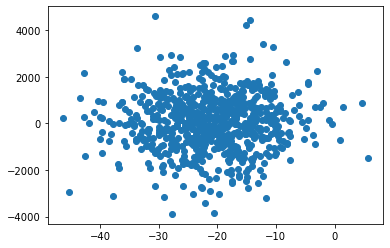

In [137]:
from matplotlib import pyplot as plt
z = vae.f_xz(x).rsample().detach().numpy()
plt.scatter(
    z[:, 0],
    z[:, 1]
)